In [2]:
import multiprocessing as mp
mp.set_start_method('spawn', force = True)
import shelve
import pandas as pd
import numpy as np
import lightgbm as lgb
import shap
import concurrent.futures

shap.initjs()

In [13]:
filename='/u/scratch/s/seanchea/models/OSR2/2/python/context2/saveData'
my_shelf = shelve.open(filename)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()

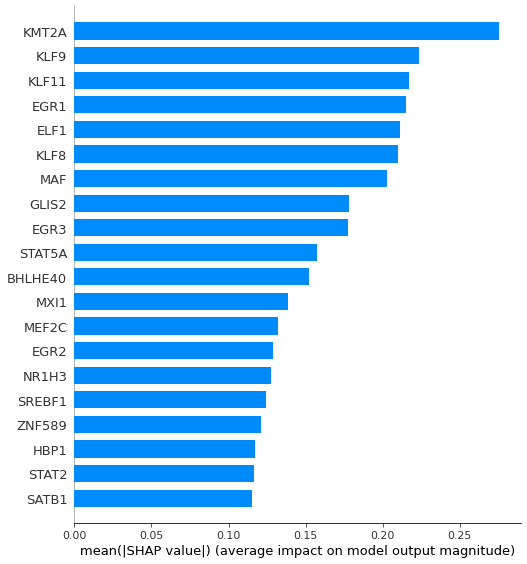

In [4]:
shap.summary_plot(shap_values_full[1], features = X, feature_names = features, plot_type="bar")

In [3]:
explainer = shap.TreeExplainer(trees)

In [6]:
shap.force_plot(explainer.expected_value, shap_values_full[1][10,:], X.iloc[10,:])

&lt;shap.plots._force.AdditiveForceVisualizer at 0x7f0e12465ac0&gt;

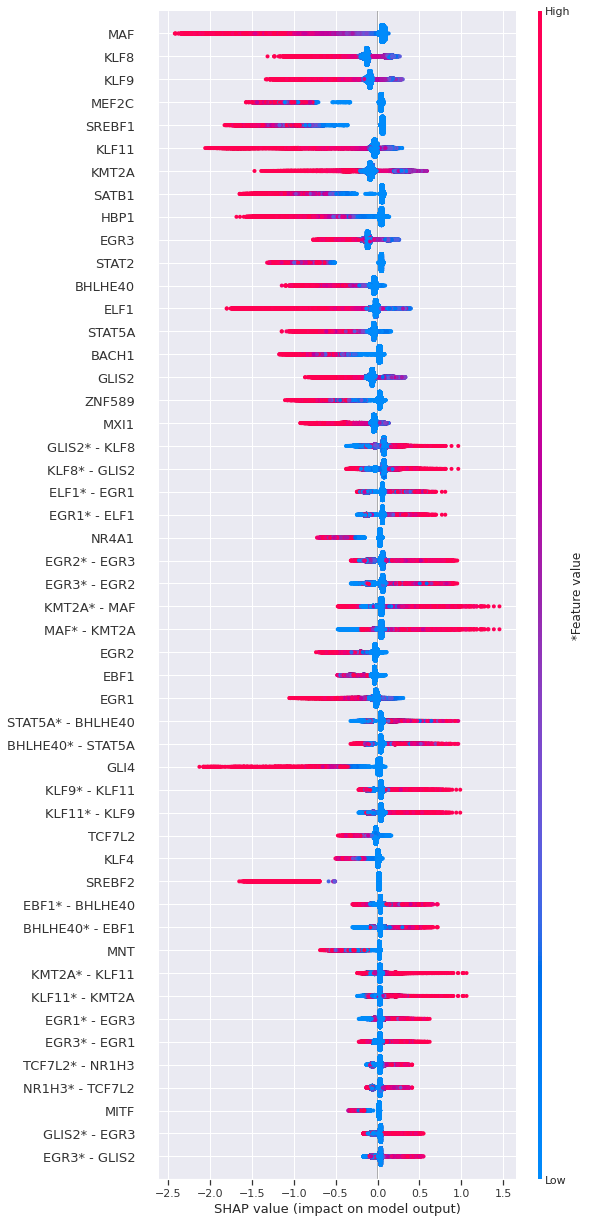

In [14]:
shap.summary_plot(allInteractions_full, features=X, max_display = 50, plot_type = "compact_dot")

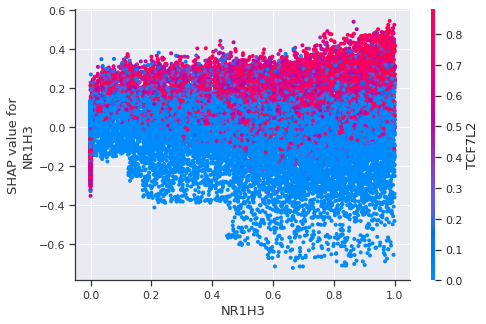

In [15]:
shap.dependence_plot("NR1H3", shap_values_full[1], X)

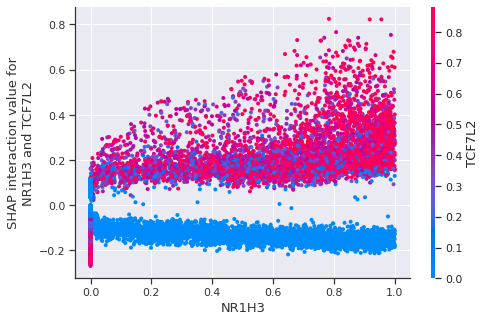

In [17]:
shap.dependence_plot(["NR1H3", "TCF7L2"], allInteractions_full[:32457, :, :], X.iloc[:32457, :])

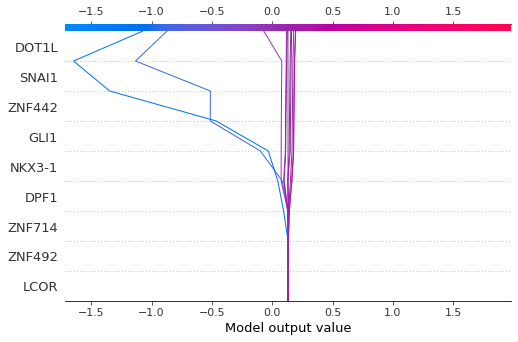

In [76]:
shap.decision_plot(explainer.expected_value, shap_values_full[1][0:10], feature_names=features, feature_display_range=range(8, -1, -1))

In [17]:
allInteractions_full.shape[0]/2

32457.0

In [18]:
avg = np.mean(allInteractions_full[:32457,:,:], axis=0)


In [21]:
import scipy as sc
clust = sc.cluster.hierarchy.fclusterdata(avg, 0.05, criterion="distance", method="average")
pruned = avg[(clust!=1), :]
pruned = pruned[:, (clust!=1)]
from itertools import compress
pruned_features = list(compress(features, clust!=1))
len(pruned_features)

25

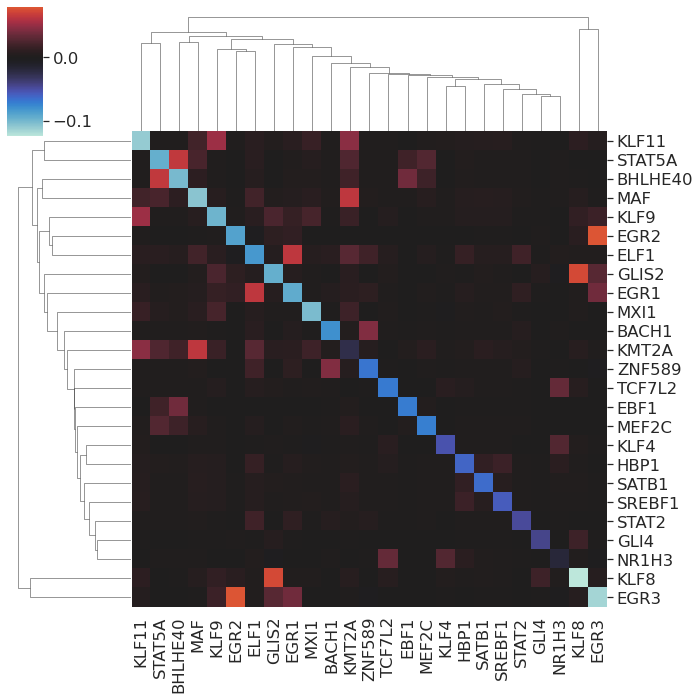

In [22]:
import seaborn as sns
import matplotlib.pylab as plt
sns.set(font_scale=1.5)
ax = sns.clustermap(pruned, method="ward", center=0, xticklabels=pruned_features, yticklabels=pruned_features, square=True)
plt.show()

In [3]:
filename='/u/scratch/s/seanchea/models/OSR2/' + str(1) + '/python/context2/saveData'
my_shelf = shelve.open(filename)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()
avg = np.mean(allInteractions_full[:32457, :, :], axis=0)
for i in range(8):
    filename='/u/scratch/s/seanchea/models/OSR2/' + str(i + 2) + '/python/context2/saveData'
    my_shelf = shelve.open(filename)
    for key in my_shelf:
        globals()[key]=my_shelf[key]
    my_shelf.close()
    avg1 = np.mean(allInteractions_full[:32457, :, :], axis=0)
    avg = np.mean(np.stack([avg,avg1], axis=0), axis=0)

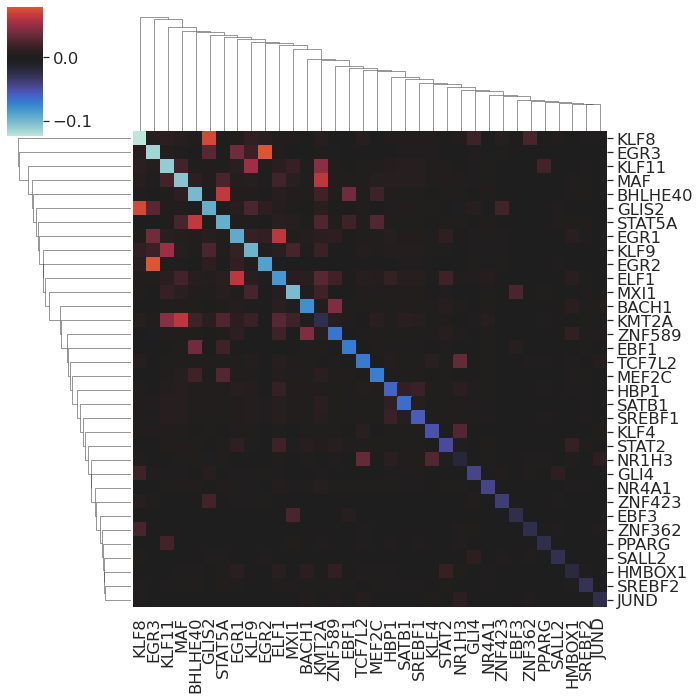

In [8]:
import scipy as sc
clust = sc.cluster.hierarchy.fclusterdata(avg, 0.03, criterion="distance", method="average")
pruned = avg[(clust!=1), :]
pruned = pruned[:, (clust!=1)]
from itertools import compress
pruned_features = list(compress(features, clust!=1))
import seaborn as sns
import matplotlib.pylab as plt
sns.set(font_scale=1.5)
ax = sns.clustermap(pruned, method="average", center=0, xticklabels=pruned_features, yticklabels=pruned_features, square=True)
plt.show()

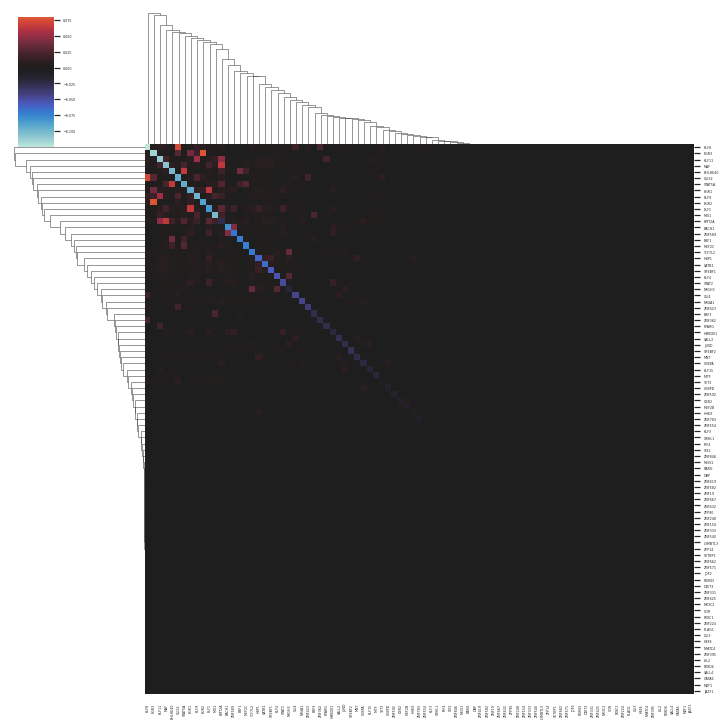

In [6]:
import seaborn as sns
import matplotlib.pylab as plt
sns.set(font_scale=0.3)
ax = sns.clustermap(avg, method="average", center=0, xticklabels=features, yticklabels=features, square=True)
plt.show()

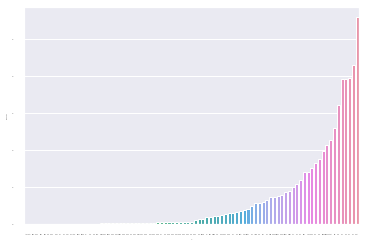

In [8]:
import seaborn as sns
avg = np.mean(shap_values_full[1][:32457,:], axis=0)
df = pd.DataFrame({'TF':features, 'Mean SHAP':avg})
sns.set(font_scale=0.05)
sns.barplot(x="TF", y="Mean SHAP", data=df, order=df.sort_values('Mean SHAP').TF)